This notebooks is just cleaning up the tn movie budgets dataset- removing '$' and ',' from the budgets and looking for NaNs. I didn't end up using this dataset in the final project.

In [1]:
import pandas as pd

In [2]:
budgets_df = pd.read_csv('../data/zippedData/tn.movie_budgets.csv.gz', compression = 'gzip')
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
budgets_df.describe

<bound method NDFrame.describe of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1

In [5]:
#remove dollar signs from the production budget
budgets_df['production_budget'] = [x.strip('$') for x in budgets_df['production_budget']]

In [6]:
#remove commas from the production budget
budgets_df['production_budget'] = [int(x.replace(',', '')) for x in budgets_df['production_budget']]

In [7]:
#remove dollar signs and commas from the two _gross columns and check
budgets_df['domestic_gross'] = [int(x.strip('$').replace(',', '')) for x in budgets_df['domestic_gross']]
budgets_df['worldwide_gross'] = [int(x.strip('$').replace(',', '')) for x in budgets_df['worldwide_gross']]
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [8]:
#looking for min and max of the columns
budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [9]:
budgets_df['production_budget'].unique()

array([425000000, 410600000, 350000000, 330600000, 317000000, 306000000,
       300000000, 275000000, 260000000, 258000000, 250000000, 232000000,
       230000000, 225000000, 220000000, 217000000, 215000000, 210000000,
       207000000, 205000000, 200000000, 195000000, 190000000, 187500000,
       186000000, 185000000, 182000000, 180000000, 179000000, 178000000,
       175000000, 170000000, 165000000, 163000000, 160000000, 156000000,
       155000000, 152000000, 151500000, 151000000, 150000000, 149000000,
       145000000, 144000000, 142000000, 140000000, 139000000, 138000000,
       137500000, 137000000, 136200000, 135000000, 132900000, 132000000,
       130000000, 129000000, 127500000, 127000000, 125000000, 123000000,
       120000000, 117000000, 116000000, 115000000, 113500000, 112000000,
       111000000, 110000000, 109000000, 108000000, 106000000, 105000000,
       104000000, 103300000, 103000000, 102500000, 102000000, 100000000,
        99000000,  98000000,  97000000,  95000000, 

In [10]:
budgets_df['domestic_gross'].min()

0

In [11]:
budgets_df['worldwide_gross'].min()

0

In [12]:
#create a release year column by extracting the year from the release date
budgets_df['release_year'] = [int(x[-4:]) for x in budgets_df['release_date']]
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [13]:
#exploring data
budgets_df[budgets_df['release_year'] > 2010].sort_values(by = ['domestic_gross', 'worldwide_gross']).head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,2020
479,80,"Dec 13, 2017",Bright,90000000,0,0,2017
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,2019
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,2020
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,2019
671,72,"Dec 31, 2019",355,75000000,0,0,2019
951,52,"Dec 11, 2015",The Ridiculous 6,60000000,0,0,2015
952,53,"Nov 8, 2019",Midway,59500000,0,0,2019
1205,6,"Dec 31, 2020",Hannibal the Conqueror,50000000,0,0,2020
1206,7,"Nov 8, 2019",Arctic Dogs,50000000,0,0,2019


In [14]:
budgets_df.sort_values(by = ['domestic_gross', 'worldwide_gross']).head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,2020
479,80,"Dec 13, 2017",Bright,90000000,0,0,2017
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,2019
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,2020
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,2019
671,72,"Dec 31, 2019",355,75000000,0,0,2019
951,52,"Dec 11, 2015",The Ridiculous 6,60000000,0,0,2015
952,53,"Nov 8, 2019",Midway,59500000,0,0,2019
1205,6,"Dec 31, 2020",Hannibal the Conqueror,50000000,0,0,2020
1206,7,"Nov 8, 2019",Arctic Dogs,50000000,0,0,2019


In [15]:
#create an ROI column using domestic gross
budgets_df['domestic_return_on_dollar'] = budgets_df['domestic_gross'] / budgets_df['production_budget']
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_return_on_dollar
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,1.789430
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,0.587101
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,0.122178
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1.388403
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,1.956408


In [16]:
#create domestic net column
budgets_df['domestic_net'] = budgets_df['domestic_gross'] - budgets_df['production_budget']
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_return_on_dollar,domestic_net
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,1.789430,335507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,0.587101,-169536125
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,0.122178,-307237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1.388403,128405868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,1.956408,303181382


In [17]:
#look at highest netting movies
budgets_df.sort_values(by=['domestic_net'], ascending = False).head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_return_on_dollar,domestic_net
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,3.060988,630662225
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018,3.500298,500059566
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,3.296820,459363944
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,1977,41.908910,449998007
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,3.033817,437270625
3525,26,"Jun 11, 1982",ET: The Extra-Terrestrial,10500000,435110554,792965326,1982,41.439100,424610554
43,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,2018,3.042909,408581744
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,2.770131,398279547
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,2.262718,378815482
692,93,"May 19, 2004",Shrek 2,70000000,441226247,937008132,2004,6.303232,371226247


In [18]:
#look at highest roi movies
budgets_df.sort_values(by=['domestic_return_on_dollar'], ascending = False).head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_return_on_dollar,domestic_net
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,1972,1800.000000,44975000
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,1993,291.560000,2033920
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,2009,239.819578,107468810
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,1999,234.231832,139939099
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,2015,227.644100,22664410
5715,16,"Aug 9, 1995",The Brothers McMullen,50000,10426506,10426506,1995,208.530120,10376506
5665,66,"Oct 18, 1974",The Texas Chainsaw Massacre,140000,26572439,26572439,1974,189.803136,26432439
5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,2004,177.374892,11464368
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041,2005,164.582727,179941
5372,73,"Aug 11, 1973",American Graffiti,777000,115000000,140000000,1973,148.005148,114223000


In [19]:
#check for null values
budgets_df.isna().sum()

id                           0
release_date                 0
movie                        0
production_budget            0
domestic_gross               0
worldwide_gross              0
release_year                 0
domestic_return_on_dollar    0
domestic_net                 0
dtype: int64

In [20]:
import seaborn as sns

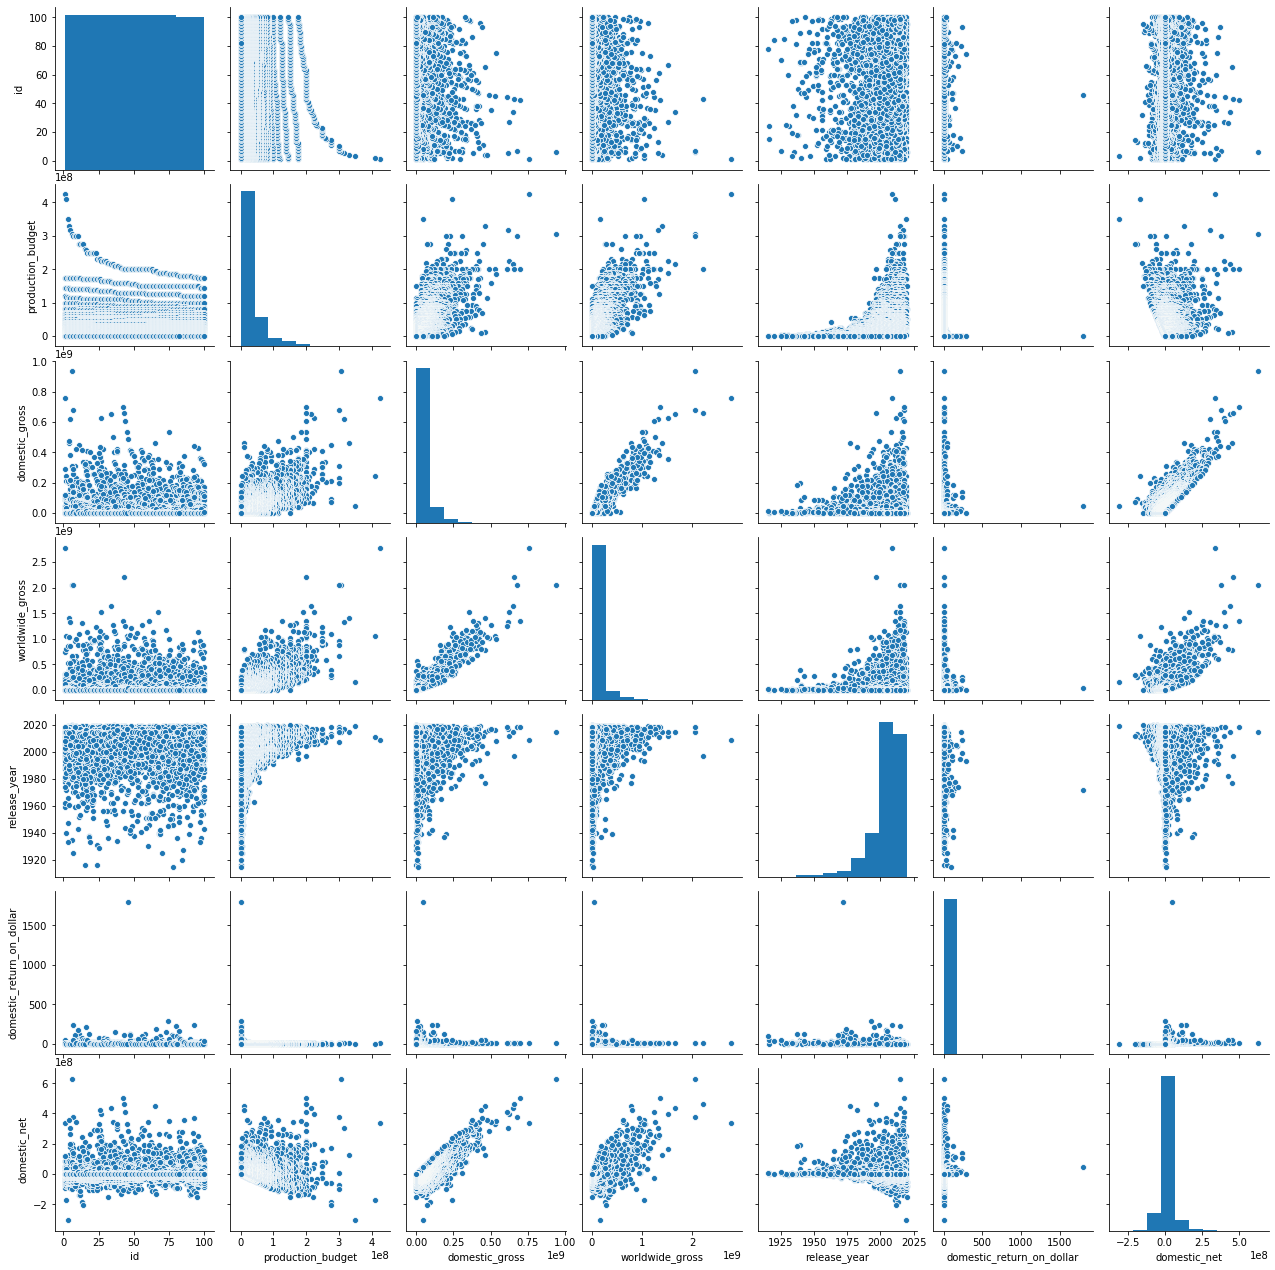

In [21]:
#pairplot to see if there are interesting correlations
sns.pairplot(budgets_df)

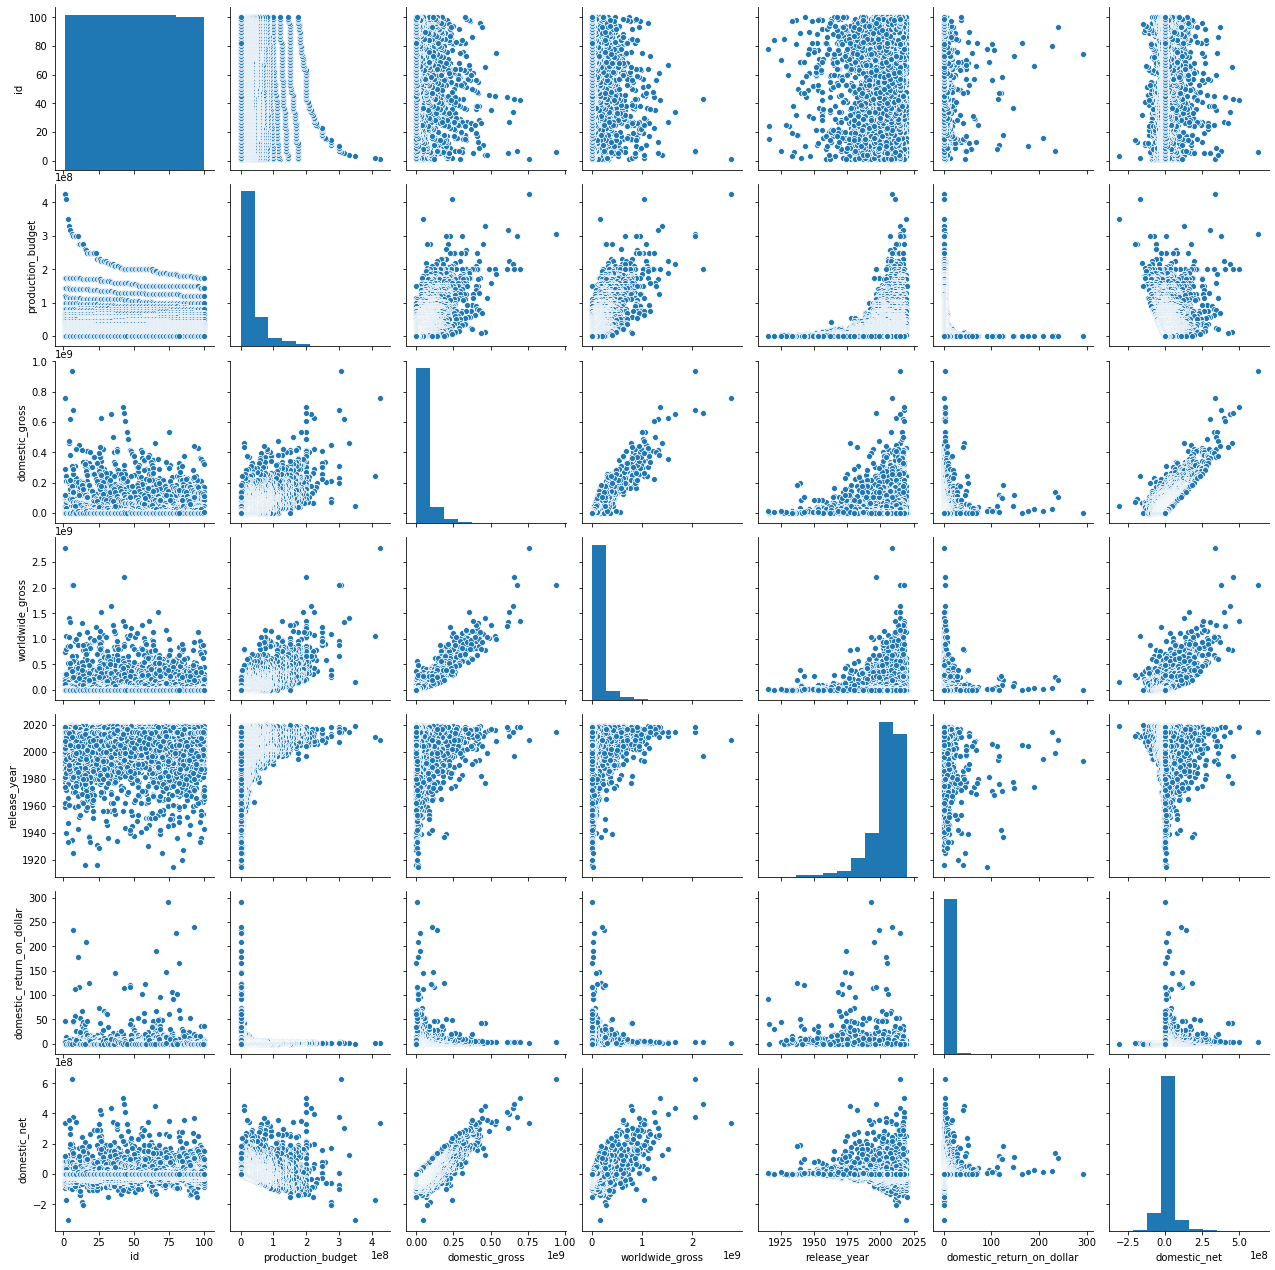

In [22]:
#remove outlier on domestic_return_on_dollar, Deep Throat
sns.pairplot(budgets_df[budgets_df['movie']  != 'Deep Throat'])

In [23]:
budgets_df[budgets_df['release_year'] >= 2000].sort_values(by=['domestic_return_on_dollar'], ascending = False).head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_return_on_dollar,domestic_net
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,2009,239.819578,107468810
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,2015,227.644100,22664410
5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,2004,177.374892,11464368
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041,2005,164.582727,179941
5507,8,"Jun 11, 2004",Napoleon Dynamite,400000,44540956,46122713,2004,111.352390,44140956
5680,81,"Sep 29, 2006",Facing the Giants,100000,10178331,10243159,2006,101.783310,10078331
5765,66,"Mar 9, 2001",Dayereh,10000,673780,673780,2001,67.378000,663780
5428,29,"Sep 26, 2008",Fireproof,500000,33456317,33473297,2008,66.912634,32956317
5656,57,"May 16, 2007",Once,150000,9445857,23323631,2007,62.972380,9295857
5430,31,"Aug 6, 2004",Open Water,500000,30500882,55518641,2004,61.001764,30000882


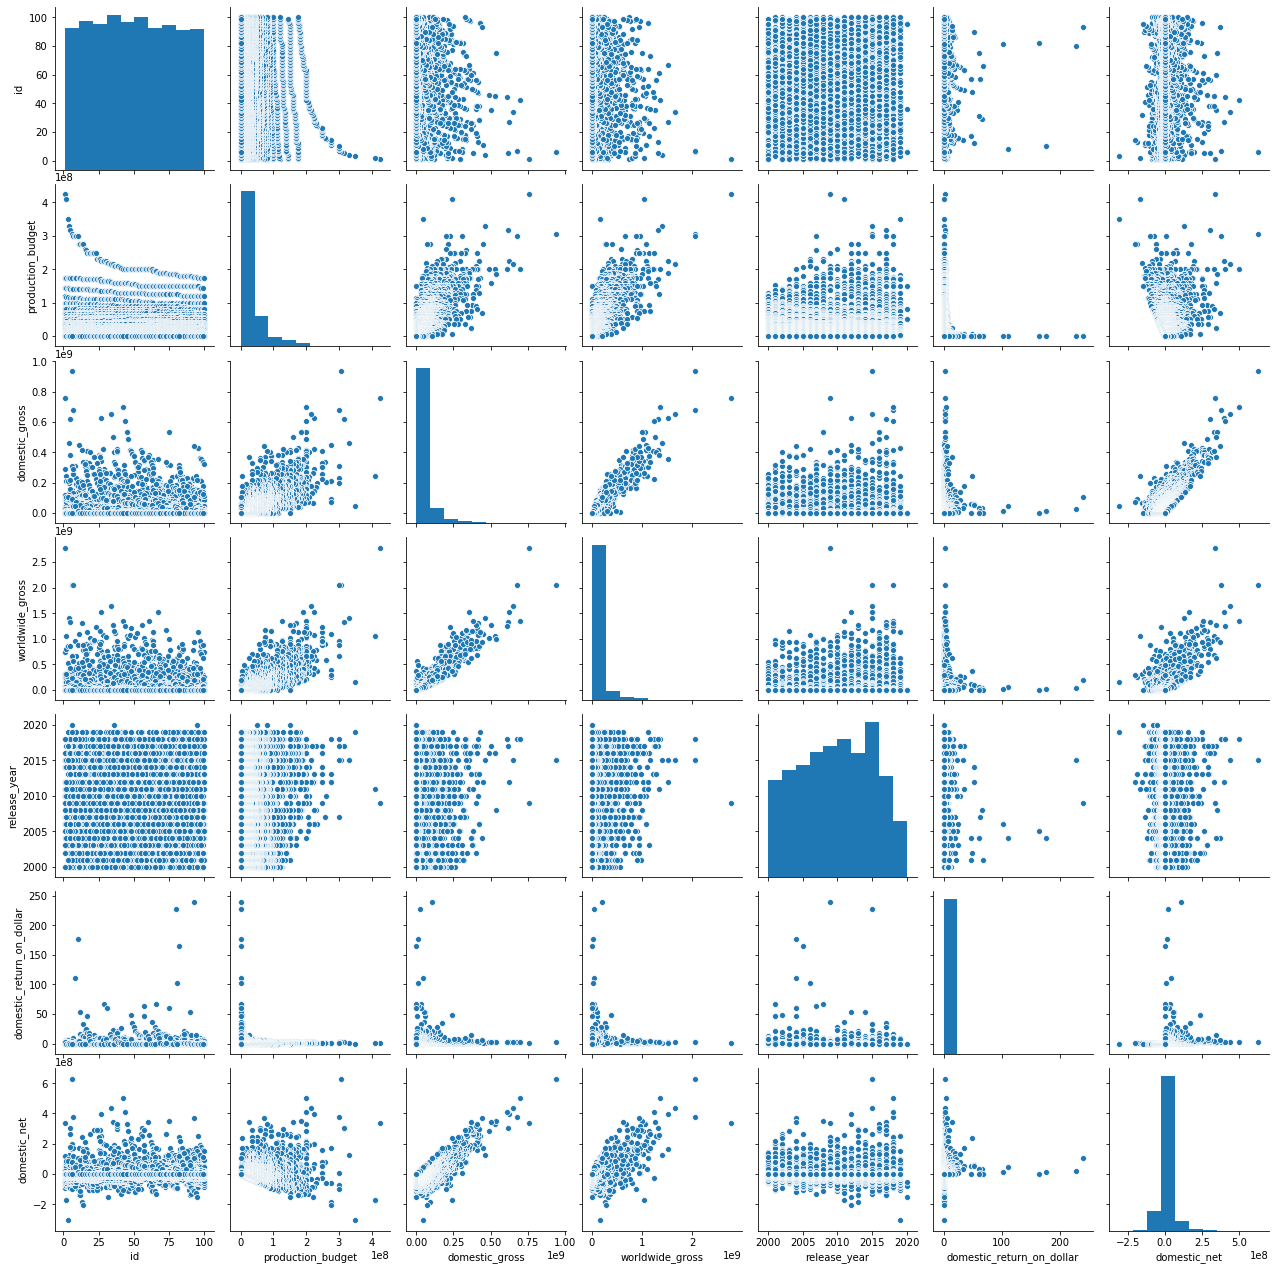

In [24]:
sns.pairplot(budgets_df[budgets_df['release_year'] >= 2000])

In [25]:
len(budgets_df[budgets_df['release_year'] > 2000])


4198

In [26]:
#limit data to the last 20 years
recent_budgets_df = budgets_df[budgets_df['release_year'] > 2000]

In [27]:
#removed movies that don't have profit information available
recent_budgets_df = recent_budgets_df[recent_budgets_df['domestic_return_on_dollar'] != 0]

In [28]:
#what are the mean and median budget for movies with a ROI of 50 and over, and ROI under 50? 
high_roi_df = recent_budgets_df[recent_budgets_df['domestic_return_on_dollar'] >= 50]
high_roi_df['production_budget'].median()

150000.0

In [29]:
#what are the mean and median budget for movies with a ROI of 25 and over, and ROI under 25? 
recent_budgets_df[recent_budgets_df['domestic_return_on_dollar'] >= 25].median()


id                           5.350000e+01
production_budget            4.750000e+05
domestic_gross               3.312298e+07
worldwide_gross              5.082068e+07
release_year                 2.006500e+03
domestic_return_on_dollar    5.697147e+01
domestic_net                 3.237298e+07
dtype: float64

In [30]:
high_roi_df['production_budget'].mean()

341007.6923076923

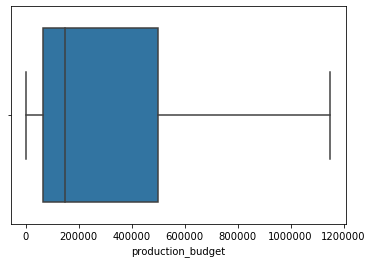

In [31]:
#look at distribution of production budgets for high roi films
sns.boxplot(high_roi_df['production_budget'])


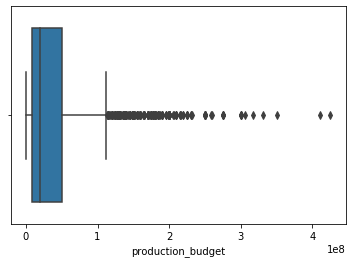

In [32]:
#look at distribution of production budgets for low roi films
low_roi_df = recent_budgets_df[recent_budgets_df['domestic_return_on_dollar'] < 50]
sns.boxplot(low_roi_df['production_budget'])

In [33]:
#checking for duplicates
duplicated_low_roi_df = low_roi_df[low_roi_df.duplicated(['movie'], keep = False)]
duplicated_low_roi_df.sort_values(by = 'movie')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_return_on_dollar,domestic_net
3307,8,"Aug 14, 2015",Brothers,13000000,656688,17856688,2015,0.050514,-12343312
2140,41,"Dec 4, 2009",Brothers,26000000,28544157,45043870,2009,1.097852,2544157
2652,53,"Aug 17, 2007",Death at a Funeral,20000000,8580428,46790428,2007,0.429021,-11419572
2463,64,"Apr 16, 2010",Death at a Funeral,21000000,42739347,48977233,2010,2.035207,21739347
297,98,"Aug 7, 2015",Fantastic Four,120000000,56117548,167849187,2015,0.467646,-63882452
484,85,"Jul 8, 2005",Fantastic Four,87500000,154696080,333132750,2005,1.767955,67196080
3014,15,"Aug 31, 2007",Halloween,15000000,58269151,77514401,2007,3.884610,43269151
3535,36,"Oct 19, 2018",Halloween,10000000,159342015,254900667,2018,15.934202,149342015
3824,25,"Nov 13, 2015",Heist,8900000,50136,3324131,2015,0.005633,-8849864
1703,4,"Nov 9, 2001",Heist,35000000,23483357,28906817,2001,0.670953,-11516643


In [34]:
#look for duplicates in high roi film dataset
duplicated_high_roi_df = high_roi_df[high_roi_df.duplicated(['movie'], keep = False)]
duplicated_high_roi_df.sort_values(by = 'movie')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_return_on_dollar,domestic_net


It looks like the duplicates in the low roi dataset are of name only- different release years. No duplicates in the high roi dataset